#  STEP 1                    EXPLORATORY DATA ANALYSIS

# Step a:
#Loading the pandas and matplotlib library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step b:
#reading the file

#the pandas library is loaded into the jupyter notebook and it's object is created aka aliasis.
#reference variable has the built-in function to read csv files i.e. read_csv() 
#file path is given as a parameter inside the built in function from pandas library.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
# the dataframe is created by default using the built-in function

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Step  c:
#the type  of the variable created is then checked by using type(variable)
#dataframe is it's type

In [4]:
type(df)

pandas.core.frame.DataFrame

# Step d:
#get the infomation like types of data,class,count, column names,memory usage using dataframe.info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# step e:
#get the statistical information like count, mean, standard deviation, minimum, maximum and quartiles using dataframe.describe()

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step f:
#shape and size of the dataframe using dataframe.shape where shape is an attribute

In [7]:
print(df.shape) # the data frame has 25 rows and 2 columns

(25, 2)


# Step g:
#know more about column names using dataframe.columns where columns is an attribute

In [8]:
df.columns # the dataframe has 'Hours' and 'Scores' as the columns

Index(['Hours', 'Scores'], dtype='object')

# Step h: 
#the seaborn library is then loaded and the reference plt is created as an aliasis/reference

In [9]:
import seaborn as sns

<AxesSubplot:>

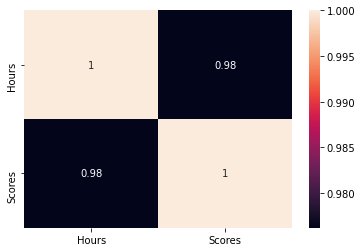

In [10]:
sns.heatmap(df.corr(),annot=True)

#seaborn is an exquisit library is used for visualization and top notch data science industry expert uses it due to it's different types of visual representation 
#sns.heatmat(df,annot=True) is used to represent the correlations between the 2 variables(independent and dependent).
#the parameters df and annot is set to true to get the coefficient of correlations.
#here we could see that, the correlation between Hours and Scores are really high and it is also positively correlated to each other

<AxesSubplot:xlabel='Hours'>

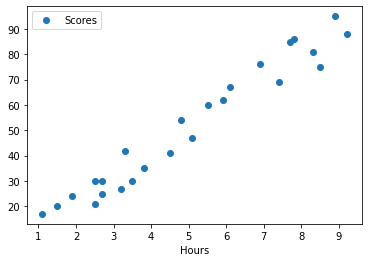

In [11]:
df.plot(x='Hours',y='Scores',style='o')

#the dataframe variable itself has the plotting method. X variable takes Hours and y variable takes Scores. The style parameter
is used to mention how should the datapoints be visualized
#here, there is a positive correlation between scores and hours. The slope/direction is rising positively.
#hence it is positively correlated to each other.
#In other words, as the Number of hours increases, the Scores increases by default.

# Step 2:  --USING LINEAR REGRESSION ML ALGORITHM--

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#the LinearRegression model is loaded using sklearn.linear_model and train_test_split is loaded using sklearn.model_selection

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

#the independent variable is X and the dependent variable is y
#.iloc is used to get 2-D array for further training and testing

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#the train_test_split takes 4 variables X,y , test_size is 30% of entire data and random_state is always set to 0 if we do not want the results to change at each kernel run

In [15]:
print(X_train.shape,X_test.shape) #17/25 is  68% of the entire data
print(y_train.shape,y_test.shape) #8/25 is 32% of the entire data

(17, 1) (8, 1)
(17,) (8,)


In [16]:
linear_model = LinearRegression()

In [17]:
linear_model.fit(X_train,y_train)

LinearRegression()

<AxesSubplot:>

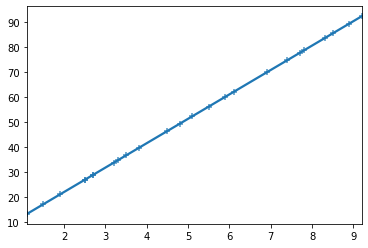

In [31]:
line = linear_model.coef_*X+linear_model.intercept_
#plt.scatter(X,y)
#plt.plot(X,line)
#plt.show()
sns.regplot(X,line,marker='+')

#regplot is used to plot the regression lines using seaborn library
#marker used here is '+'

#the linear model has coef_ and intercept_ attributes which is used to generate the line
#the predicted line is fitted among the original data points(visualizatation) which is is approximate to the linear regression model in ML.

In [19]:
pred = linear_model.predict(X_test)

In [20]:
pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [21]:
pred_orig = pd.DataFrame({'original':y_test,'predicted':pred})

In [22]:
pred_orig

,original,predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


#pd.DataFrame is used to get the results in the form of dataframe
#the original data and the predicted data

# Step 3:   -- Evaluating the model--

In [23]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#sklearn.metrics is used to load the regression evaluation metrics
#here the metrics used are 
1) r2_score
3) mean_squared_error
4) mean_absolute_error

In [24]:
print(r2_score(y_test,pred))

0.9568211104435257


#r2_score is used to estimate how well the regression model prediction is approximate to the real data points

In [25]:
print(mean_squared_error(y_test,pred))

22.96509721270043


#mean_squared_error is the square of average difference between the actual data points and the predicted data points

In [26]:
print(mean_absolute_error(y_test,pred))

4.419727808027652


#mean_absolute_error is the modulus of average difference between the actual data points and the predicted data points incase, the difference is negative, it is made to positive by absolute.